In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.12.0'

### Introduction to Regression with NN in TF

Predicting **numerical** variables based on few given features.

### Getting Data Ready

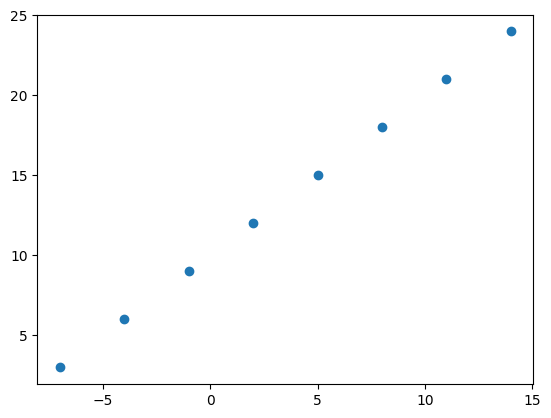

In [3]:
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14], dtype=np.float32)
y = np.array([3, 6, 9, 12, 15, 18, 21, 24], dtype=np.float32)

plt.scatter(X,y)

In [4]:
# The model is as follow
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and Output Shapes

In [5]:
print('Input shape :', X.shape)
print('Output shape :', y.shape)

Input shape : (8,)
Output shape : (8,)


In [6]:
print('Input sample shape :', X[0].shape)
print('Output sample shape :', y[0].shape)

Input sample shape : ()
Output sample shape : ()


### Modelling in Tensorflow

1. Define model
*   Input Layer Shape
*   Output Layer Shape
*   Hidden Layer Information

2. Compile model
*   Loss Function
*   Optimizer
*   Evaluation Metrics

3. Fitting Model
*   Input data along with Labels



In [85]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    layers=[
            tf.keras.layers.InputLayer(input_shape=(1,)),
            tf.keras.layers.Dense(1)
            ]
)

'''
model.save_weights(
    filepath="./trail_2.h5", overwrite=True, save_format='h5', options=None
)
'''

'\nmodel.save_weights(\n    filepath="./trail_2.h5", overwrite=True, save_format=\'h5\', options=None\n)\n'

In [86]:
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae", "mse"])

In [87]:
model.fit(x=X, y=y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 393ms/step - loss: 13.2513 - mae: 13.2513 - mse: 216.3722
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 13.1188 - mae: 13.1188 - mse: 209.8636
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 12.9863 - mae: 12.9863 - mse: 203.5058
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 12.8538 - mae: 12.8538 - mse: 197.2989
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.7213 - mae: 12.7213 - mse: 191.2428


In [10]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [11]:
y_pred = model.predict(x=[17])
float(y_pred[0][0])

1/1 [==============================] - 0s 95ms/step


-4.047847270965576

In [12]:
27 - y_pred

array([[31.047848]], dtype=float32)

### Imporove Model

We can imporve the model in any one of the following steps.

1. Model Definiton 
* Number of layers
* Number of neuros
* acitivation functions

2. Model Compiling stage
* Optimizer
* Learning Rate

3. Fitting Stage
* Number of epochs
* More data

#### Trail - 1 ( With More Epochs )

In [13]:
model.fit(x=X, y=y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 14ms/step - loss: 14.2937 - mae: 14.2937
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1612 - mae: 14.1612
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0287 - mae: 14.0287
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.8962 - mae: 13.8962
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7637 - mae: 13.7637
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6312 - mae: 13.6312
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4987 - mae: 13.4987
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3662 - mae: 13.3662
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2337 - mae: 13.2337
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1012 - mae: 13.1012
Epoch 11/100
1/1 [==============================] 

In [14]:
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 129ms/step


array([[29.564648]], dtype=float32)

In [15]:
27 - y_pred

array([[-2.5646477]], dtype=float32)

There is a good improvement from previous iteration.

#### Trail - 2 ( With More Epochs and New Optimizer )

In [88]:
def build_small_model():
    model = tf.keras.Sequential(
            layers=[
                tf.keras.layers.InputLayer(input_shape=(1,)),
                tf.keras.layers.Dense(1)
                ]
    )

    model.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["mae", "mse"]
                )
    return model



In [91]:
model = build_small_model()
model.fit(X,y,epochs=100, verbose=0)
y_pred=model.predict([17])
y_pred

1/1 [==============================] - 0s 69ms/step


array([[0.6593088]], dtype=float32)

In [18]:
27-y_pred

array([[19.641973]], dtype=float32)

Not so improved from last iteration

#### Trail - 3 ( With More Epochs, New Optimizer, More Hidden layers )

In [92]:

def build_large_model():
    larger_model = tf.keras.Sequential(
        layers=[
            tf.keras.layers.InputLayer(input_shape=(1,)),
            tf.keras.layers.Dense(100, activation=None),
            tf.keras.layers.Dense(100, activation=None),
            tf.keras.layers.Dense(100, activation=None),
            tf.keras.layers.Dense(1)
            ]

    )

    larger_model.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae", "mse"])
    
    return larger_model

In [93]:
larger_model = build_large_model()
larger_model.fit(X,y,epochs=100, verbose=0)

In [21]:
y_pred=larger_model.predict([17])
y_pred

1/1 [==============================] - 0s 95ms/step


array([[28.330618]], dtype=float32)

### Evaluating Model Performance

* Visulize, Visulize, Visulize

1. Visulize the data
2. Visulize the Trained Model  ( Intrepretation )
3. Visulize the Training Process (Evolution stage of model)
4. Visulize the Model predictions

In [22]:
from numpy.ma.core import shape
X_large = tf.range(-100,100,4)
X_large

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
y_large = X_large + 10 #This pattren the model should learn without telling to it
y_large

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

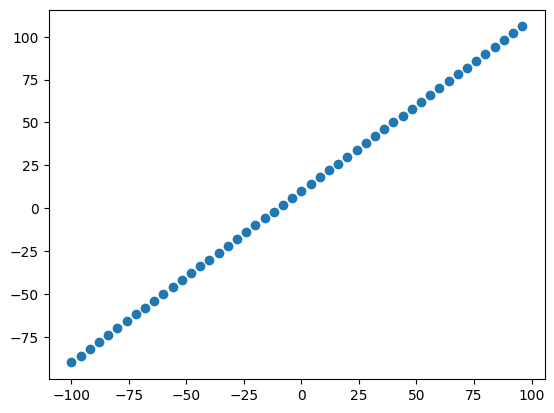

In [24]:
plt.scatter(X_large,y_large)

#### Splitting the Data into Train and Test

* Training set (used for model training)
* Validation set (used to model score after each epoch)
* Test set (for testing final model)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_large.numpy(),y_large.numpy(), test_size=0.2, random_state=42)
print(len(X_train), len(y_train))
X_train , y_train

40 40


(array([ -52,  -84,   48,  -68,  -88,  -76,   64,   84,   88,  -40,  -64,
         -36,   -4,   36,   24, -100,   76,    8,   32,  -80,   16,  -56,
          44,  -96,  -16,  -92,   72,   40,   -8,   60,  -60,  -12,  -28,
          96,  -20,  -72,   68,  -44,   12,   52], dtype=int32),
 array([-42, -74,  58, -58, -78, -66,  74,  94,  98, -30, -54, -26,   6,
         46,  34, -90,  86,  18,  42, -70,  26, -46,  54, -86,  -6, -82,
         82,  50,   2,  70, -50,  -2, -18, 106, -10, -62,  78, -34,  22,
         62], dtype=int32))

In [26]:
print(len(X_test), len(y_test))
X_test , y_test

10 10


(array([-48,  56,  20,  80, -32,  92,   4,   0,  28, -24], dtype=int32),
 array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14], dtype=int32))

#### Data Visulization

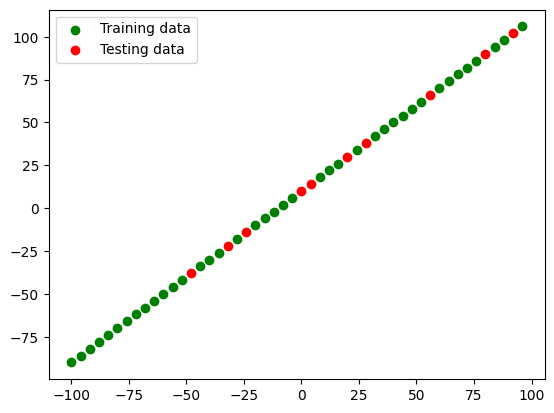

In [27]:
plt.scatter(X_train,y_train,c='g', label='Training data')
plt.scatter(X_test,y_test,c='r', label='Testing data')
plt.legend()

In [28]:
small_model = build_small_model()
large_model = build_large_model()



#### Model Visulization

In [29]:
small_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params : Number of weights and biasses (y=mx+c)
* Trainable params : 2 ( All the parameters are going to update after each epoch) 
* Non-trainable params : These will not update during training

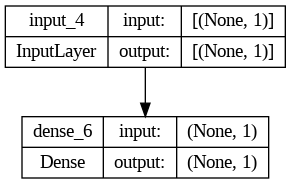

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(small_model,show_shapes=True)

In [31]:
large_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


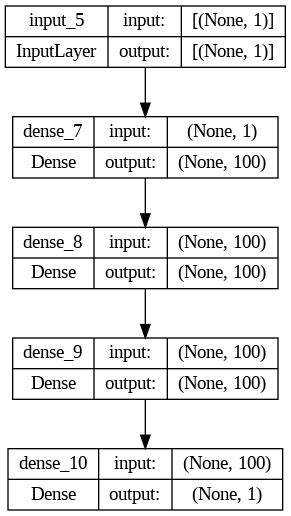

In [32]:
plot_model(large_model,show_shapes=True)

In [94]:
small_model.fit(X_train,y_train,epochs=100, verbose=0)

In [95]:
y_pred_small = small_model.predict(X_test)
y_pred_small

1/1 [==============================] - 0s 35ms/step


array([[-8.9963913e+00],
       [ 1.0501881e+01],
       [ 3.7524796e+00],
       [ 1.5001482e+01],
       [-5.9966564e+00],
       [ 1.7251284e+01],
       [ 7.5274545e-01],
       [ 2.8119055e-03],
       [ 5.2523465e+00],
       [-4.4967895e+00]], dtype=float32)

In [96]:
y_test

array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14], dtype=int32)

In [97]:
large_model.fit(X_train,y_train,epochs=100, verbose=0)

In [98]:
y_pred_large = large_model.predict(X_test)
y_pred_large

1/1 [==============================] - 0s 46ms/step


array([[-37.58236 ],
       [ 64.26858 ],
       [ 29.012484],
       [ 87.77266 ],
       [-21.912987],
       [ 99.52467 ],
       [ 13.343107],
       [  9.425764],
       [ 36.847176],
       [-14.0783  ]], dtype=float32)

#### Predictions Visulization

In [99]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
    plt.scatter(train_data,train_labels,c='g', label='Training data')
    plt.scatter(test_data,test_labels,c='b', label='Testing data')
    plt.scatter(test_data,predictions,c='r', label='Predictions')
    plt.legend()
    return plt

Large Model Predictions Visulization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

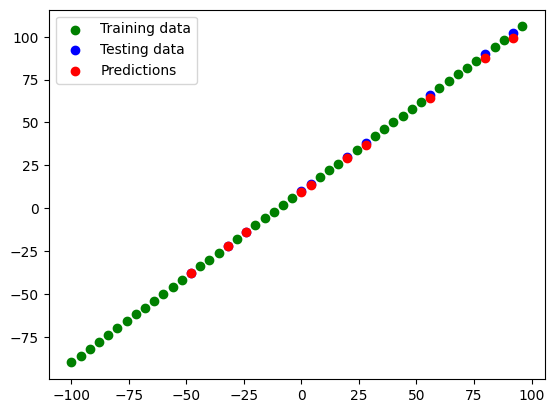

In [100]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred_large
                     )

Small Model Predictions Visulization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

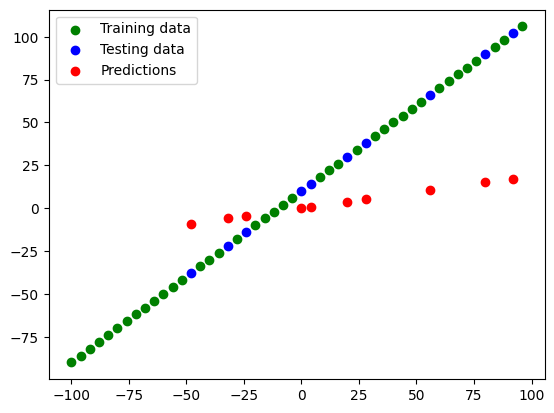

In [101]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred_small
                     )

#### Evalaution Metrics
Summarizing the predictions in a numerical way

* Mean Absolute Error ( MAE )
* Mean Square Error ( MSE )
* Huber


#### MAE

In [102]:
# Large Model MAE
evaluate_loss, evaluate_metrcis = large_model.evaluate(X_test, y_test)
print(evaluate_loss, evaluate_metrcis)


1/1 [==============================] - 0s 95ms/step - loss: 1.0388 - mae: 1.0388
1.0388494729995728 1.0388494729995728


In [103]:
# Manually measuring MAE
tf.keras.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred_large))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0388514>

In [104]:
# Small Model MAE
evaluate_loss, evaluate_metrcis = small_model.evaluate(X_test, y_test)
print(evaluate_loss, evaluate_metrcis)


1/1 [==============================] - 0s 53ms/step - loss: 35.1995 - mae: 35.1995
35.19951248168945 35.19951248168945


In [105]:
# Manually measuring MAE
tf.keras.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred_small))

<tf.Tensor: shape=(), dtype=float32, numpy=35.199512>

#### MSE

In [106]:
# Large Model MSE
tf.keras.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred_large))

<tf.Tensor: shape=(), dtype=float32, numpy=1.7339685>

In [107]:
# Small Model MSE
tf.keras.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred_small))

<tf.Tensor: shape=(), dtype=float32, numpy=1911.1569>

#### Huber metrics

In [111]:
# Large Model Huber Loss
tf.keras.losses.huber(
    y_true=y_test, 
    y_pred=tf.squeeze(y_pred_large), 
    delta=1.0
)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6549199>

In [112]:
# Small Model Huber Loss
tf.keras.losses.huber(
    y_true=y_test, 
    y_pred=tf.squeeze(y_pred_small), 
    delta=1.0
)

<tf.Tensor: shape=(), dtype=float32, numpy=34.699512>

# Running Experiments to Improve small model Performance

1. Get More Data ( more opertunities to learn patterns)
2. Using Large Models
3. Training for Longer time

In [113]:
X_train, y_train

(array([ -52,  -84,   48,  -68,  -88,  -76,   64,   84,   88,  -40,  -64,
         -36,   -4,   36,   24, -100,   76,    8,   32,  -80,   16,  -56,
          44,  -96,  -16,  -92,   72,   40,   -8,   60,  -60,  -12,  -28,
          96,  -20,  -72,   68,  -44,   12,   52], dtype=int32),
 array([-42, -74,  58, -58, -78, -66,  74,  94,  98, -30, -54, -26,   6,
         46,  34, -90,  86,  18,  42, -70,  26, -46,  54, -86,  -6, -82,
         82,  50,   2,  70, -50,  -2, -18, 106, -10, -62,  78, -34,  22,
         62], dtype=int32))

### Model experiment 1

Same as small model training for 100 epochs

In [119]:
model_1 = tf.keras.Sequential(
            layers=[
                tf.keras.layers.InputLayer(input_shape=(1,)),
                tf.keras.layers.Dense(1)
                ]
    )

model_1.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae", "mse"]
                )
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(X_train, y_train, epochs=100)

1/1 [==============================] - 0s 107ms/step
MAE :  50.147198
MSE :  3859.7026
Huber :  49.647198


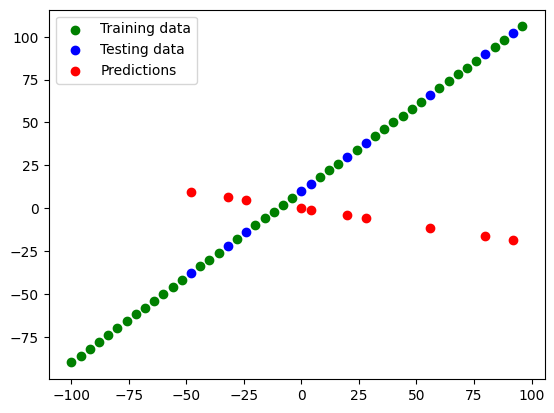

In [150]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train,
                 X_test, y_test,
                 y_pred_1)
mae_1 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_1)).numpy()
mse_1 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_1)).numpy()
huber_1 = tf.keras.losses.huber(y_test,tf.squeeze(y_pred_1)).numpy()
print("MAE : ", mae_1)
print("MSE : ", mse_1)
print("Huber : ", huber_1)

### Model experiment 2

small model with two layers training for 100 epochs

In [128]:
model_2 = tf.keras.Sequential(
            layers=[
                tf.keras.layers.InputLayer(input_shape=(1,)),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(1)
                ]
    )

model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae", "mse"]
                )
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               200       
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.fit(X_train,y_train, epochs=100)

1/1 [==============================] - 0s 36ms/step
MAE :  35.065647
MSE :  1893.6119
Huber :  34.565647


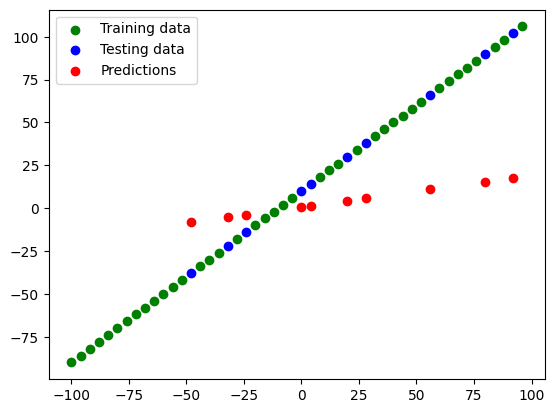

In [151]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(X_train,y_train,
                 X_test, y_test,
                 y_pred_2)
mae_2 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_2)).numpy()
mse_2 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_2)).numpy()
huber_2 = tf.keras.losses.huber(y_test,tf.squeeze(y_pred_2)).numpy()
print("MAE : ", mae_2)
print("MSE : ", mse_2)
print("Huber : ", huber_2)

### Model experiment 3

small model with two layers training for 500 epochs

In [131]:
model_3 = tf.keras.Sequential(
            layers=[
                tf.keras.layers.InputLayer(input_shape=(1,)),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(1)
                ]
    )

model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae", "mse"]
                )
model_3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               200       
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.fit(X_train,y_train, epochs=500)

1/1 [==============================] - 0s 22ms/step
MAE :  40.764565
MSE :  2550.7102
Huber :  40.264565


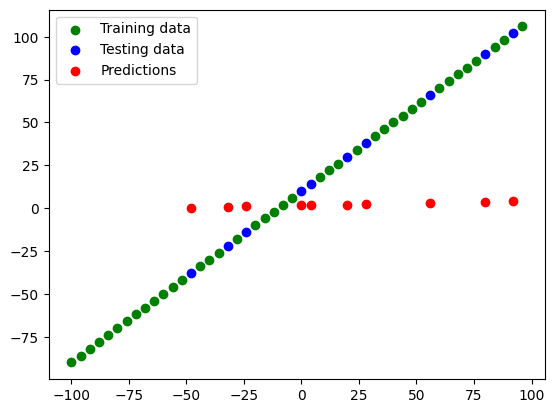

In [152]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(X_train,y_train,
                 X_test, y_test,
                 y_pred_3)
mae_3 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_3)).numpy()
mse_3 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_3)).numpy()
huber_3 = tf.keras.losses.huber(y_test,tf.squeeze(y_pred_3)).numpy()
print("MAE : ", mae_3)
print("MSE : ", mse_3)
print("Huber : ", huber_3)



### Model experiment 4

small model with two layers training for 500 epochs
with Adam Optimizer

In [156]:
model_4 = tf.keras.Sequential(
            layers=[
                tf.keras.layers.InputLayer(input_shape=(1,)),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(1)
                ]
    )

model_4.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae", "mse"]
                )
model_4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               200       
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_4.fit(X_train,y_train, epochs=1000,verbose=0)

1/1 [==============================] - 0s 62ms/step
MAE :  0.60673636
MSE :  0.56535685
Huber :  0.26829153


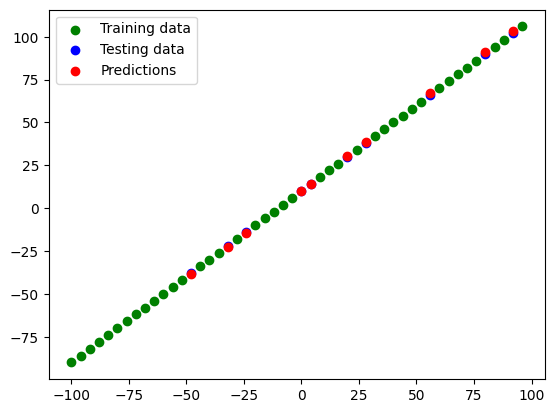

In [158]:
y_pred_4 = model_4.predict(X_test)
plot_predictions(X_train,y_train,
                 X_test, y_test,
                 y_pred_4)
mae_4 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_4)).numpy()
mse_4 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_4)).numpy()
huber_4 = tf.keras.losses.huber(y_test,tf.squeeze(y_pred_4)).numpy()
print("MAE : ", mae_4)
print("MSE : ", mse_4)
print("Huber : ", huber_4)

This is the Best Model which we decided.

In [159]:
model_5 = tf.keras.Sequential(
            layers=[
                tf.keras.layers.InputLayer(input_shape=(1,)),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(1)
                ]
    )

model_5.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae", "mse"]
                )
model_5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               200       
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dense_42 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [160]:
model_5.fit(X_train,y_train, epochs=5000,verbose=0)

1/1 [==============================] - 0s 105ms/step
MAE :  0.7172653
MSE :  0.7920961
Huber :  0.3567497


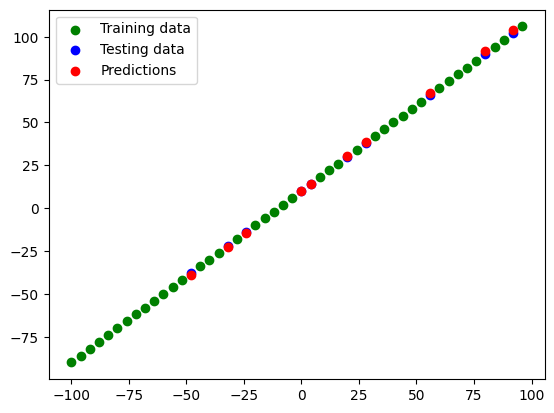

In [161]:
y_pred_5 = model_5.predict(X_test)
plot_predictions(X_train,y_train,
                 X_test, y_test,
                 y_pred_5)
mae_5 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_5)).numpy()
mse_5 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_5)).numpy()
huber_5 = tf.keras.losses.huber(y_test,tf.squeeze(y_pred_5)).numpy()
print("MAE : ", mae_5)
print("MSE : ", mse_5)
print("Huber : ", huber_5)

#### Testing on more Test Data

In [142]:
X_more_test = tf.range(-1000,1000,4)
y_more_test = X_more_test+10

16/16 [==============================] - 0s 2ms/step
MAE :  0.97579247
MSE :  1.2697567
Huber :  0.56120485


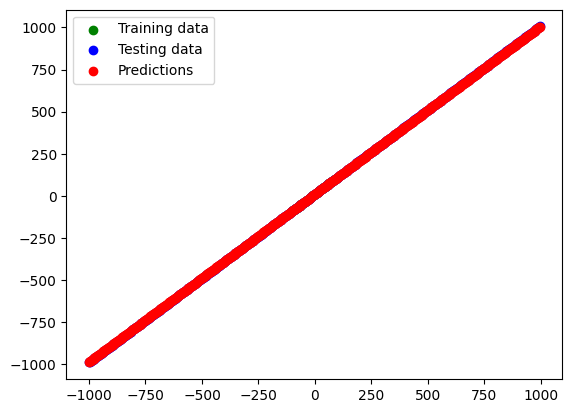

In [154]:
y_pred_more_test_4 = model_4.predict(X_more_test)
plot_predictions(X_train,y_train,
                 X_more_test, y_more_test,
                 y_pred_more_test_4)
mae_5 = tf.keras.metrics.mean_absolute_error(y_more_test,tf.squeeze(y_pred_more_test_4)).numpy()
mse_5 = tf.keras.metrics.mean_squared_error(y_more_test,tf.squeeze(y_pred_more_test_4)).numpy()
huber_5 = tf.keras.losses.huber(y_more_test,tf.squeeze(y_pred_more_test_4)).numpy()
print("MAE : ", mae_5)
print("MSE : ", mse_5)
print("Huber : ", huber_5)

# Comparing Results of various Models

In [163]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1, huber_1],
                 ["model_2", mae_2, mse_2, huber_2],
                 ["model_3", mae_3, mse_3, huber_3],
                 ["model_4", mae_4, mse_4, huber_4],
                 ["model_5", mae_5, mse_5, huber_5],
                 
                 ]
pd.DataFrame(model_results, columns=["Model", "MAE", "MSE", "HUBER"])

,Model,MAE,MSE,HUBER
0,model_1,50.147198,3859.702637,49.647198
1,model_2,35.065647,1893.611938,34.565647
2,model_3,40.764565,2550.710205,40.264565
3,model_4,0.606736,0.565357,0.268292
4,model_5,0.717265,0.792096,0.356750


### More experiment tools

* TensorBoard
* Weights & Biases ( Plugs into google colab). https://wandb.ai/site


# Saving Our Models

It is kind of serilization.

* The SavedModel Format (.pb file, Default to TensorFlow)
* HDF5 Format (.h5)

In [164]:
model_4.save("Best_Model_SavedModel_format")

In [165]:
model_4.save("Best_Model.h5")

### Loading Back and Testing Predictions

In [170]:
loaded_h5_model = tf.keras.models.load_model("/content/Best_Model.h5")
loaded_h5_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               200       
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [169]:
loaded_pb_model = tf.keras.models.load_model("/content/Best_Model_SavedModel_format")
loaded_pb_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               200       
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [182]:
# Compare Model 4 predictions with Loaded model predictions
pb_preds = loaded_pb_model.predict(X_test)

1/1 [==============================] - 0s 64ms/step


In [183]:
h5_preds = loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 121ms/step


In [181]:
model_4_preds = model_4.predict(X_test)

1/1 [==============================] - 0s 26ms/step


In [184]:
pb_preds == h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [185]:
pb_preds == model_4_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])